<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#import" data-toc-modified-id="import-0.1"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>import</a></span></li></ul></li><li><span><a href="#读取数据集" data-toc-modified-id="读取数据集-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>读取数据集</a></span></li><li><span><a href="#标准化处理" data-toc-modified-id="标准化处理-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>标准化处理</a></span></li><li><span><a href="#模型" data-toc-modified-id="模型-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>模型</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>LogisticRegression</a></span></li><li><span><a href="#svm" data-toc-modified-id="svm-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>svm</a></span></li><li><span><a href="#DecisionTreeClassifier" data-toc-modified-id="DecisionTreeClassifier-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>DecisionTreeClassifier</a></span></li><li><span><a href="#RandomForestClassifier" data-toc-modified-id="RandomForestClassifier-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>RandomForestClassifier</a></span></li><li><span><a href="#XGBoost" data-toc-modified-id="XGBoost-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>XGBoost</a></span></li></ul></li><li><span><a href="#评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score" data-toc-modified-id="评分--混淆矩阵-&amp;-precision_score-&amp;-recall_score-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>评分- 混淆矩阵 &amp; precision_score &amp; recall_score</a></span></li><li><span><a href="#深入随机森林评分" data-toc-modified-id="深入随机森林评分-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>深入随机森林评分</a></span></li></ul></div>

任务3 - 建模（2天）

用逻辑回归、svm和决策树；随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）


- 逻辑回归
- svm
- 决策树
- 随机森林
- XGBoost

Q:

1. 处理缺失值是在划分数据集前还是划分后？
2. 模型训练好，如果要应用于实际数据，对于实际数据中的缺失值有类似sklearn流水线的操作方式吗？

## import

In [1]:
import json, io, re, os, time
from datetime import datetime, timedelta
from pandas.io.json import json_normalize
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn

from collections import defaultdict, Counter
%matplotlib inline

# plt.rc('figure', figsize = (8.4,5))
# plt.rcParams['font.family'] = ['Arial Unicode MS'] 
# plt.rcParams['axes.unicode_minus'] = False 

In [3]:
# 设置显示行数
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
# 限制列宽，每列最多显示15个字符
# pd.set_option('display.max_colwidth', 15)

# 读取数据集

经过前续处理缺失值后和特征选择后

In [7]:
cols_left = ['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month', 
             'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month', 
             'first_transaction_time_diff_day', 'latest_query_time_diff_day', 
             'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest', 
             'trans_amount_increase_rate_lately', 'transd_mcc', 'trans_days_interval_filter',
             'trans_days_interval', 'repayment_capability', 'number_of_trans_from_2011', 
             'historical_trans_amount', 'historical_trans_day', 'trans_amount_3_month', 
             'abs', 'avg_price_last_12_month', 'trans_top_time_last_1_month', 'trans_top_time_last_6_month', 
             'consume_top_time_last_1_month', 'consume_top_time_last_6_month', 
             'trans_fail_top_count_enum_last_1_month', 'trans_fail_top_count_enum_last_6_month',
             'trans_fail_top_count_enum_last_12_month', 'consume_mini_time_last_1_month', 
             'max_cumulative_consume_later_1_month', 'pawns_auctions_trusts_consume_last_1_month', 
             'pawns_auctions_trusts_consume_last_6_month', 'first_transaction_day', 'trans_day_last_12_month',
             'apply_score', 'apply_credibility', 'query_sum_count', 'loans_score', 'loans_count', 
             'loans_settle_count', 'loans_overdue_count', 'latest_six_month_loan', 'history_suc_fee', 
             'history_fail_fee', 'latest_one_month_suc', 'latest_one_month_fail', 'loans_long_time', 
             'loans_credit_limit', 'loans_max_limit', 'loans_avg_limit', 'consfin_credit_limit', 
             'consfin_max_limit',
             'consfin_avg_limit', 'latest_query_day', 'loans_latest_day',
            'status']

In [9]:
train_set = pd.read_csv('train_set.csv', usecols = cols_left )
test_set = pd.read_csv('test_set.csv', usecols = cols_left)

In [10]:
train_set.head()

,trans_activity_month,trans_activity_day,rank_trad_1_month,top_trans_count_last_1_month,avg_price_top_last_12_valid_month,first_transaction_time_diff_day,latest_query_time_diff_day,loans_latest_time_diff_day,take_amount_in_later_12_month_highest,trans_amount_increase_rate_lately,transd_mcc,trans_days_interval_filter,trans_days_interval,repayment_capability,number_of_trans_from_2011,historical_trans_amount,historical_trans_day,trans_amount_3_month,abs,avg_price_last_12_month,trans_top_time_last_1_month,trans_top_time_last_6_month,consume_top_time_last_1_month,consume_top_time_last_6_month,trans_fail_top_count_enum_last_1_month,trans_fail_top_count_enum_last_6_month,trans_fail_top_count_enum_last_12_month,consume_mini_time_last_1_month,max_cumulative_consume_later_1_month,pawns_auctions_trusts_consume_last_1_month,pawns_auctions_trusts_consume_last_6_month,first_transaction_day,trans_day_last_12_month,apply_score,apply_credibility,query_sum_count,loans_score,loans_count,loans_settle_count,loans_overdue_count,latest_six_month_loan,history_suc_fee,history_fail_fee,latest_one_month_suc,latest_one_month_fail,loans_long_time,loans_credit_limit,loans_max_limit,loans_avg_limit,consfin_credit_limit,consfin_max_limit,consfin_avg_limit,latest_query_day,loans_latest_day,status
0,0.83,0.136,1.00,1.00,0.45,445,37,189,300,0.99,13.0,127.0,95.0,10480,10.0,33830,41.0,4260,830,1300,0.0,27.0,0.0,15.0,3.0,4.0,4.0,0.0,0,0,6160,434.0,93.0,530.0,78.0,12.0,493.0,16.0,16.0,2.0,3.0,16.0,10.0,0.0,0.0,302.0,2400.0,2800.0,2400.0,0.0,0.0,0.0,12.0,164.0,0
1,1.00,0.438,0.30,0.10,0.55,249,27,27,1500,0.72,14.0,6.0,6.0,15790,6.0,100060,79.0,28580,10550,1040,6.0,6.0,9.0,9.0,2.0,3.0,3.0,267070.0,2800,0,4350,238.0,82.0,545.0,79.0,22.0,515.0,59.0,53.0,2.0,27.0,62.0,19.0,4.0,0.0,351.0,2100.0,4000.0,1992.0,7700.0,18000.0,7600.0,2.0,2.0,0
2,0.83,0.486,0.25,0.05,0.50,2642,31,92,500,0.98,22.0,23.0,15.0,14050,70.0,302720,359.0,63600,650,1140,10.0,15.0,10.0,15.0,2.0,10.0,10.0,852.0,2390,1160,52310,2631.0,82.0,524.0,80.0,24.0,483.0,58.0,48.0,9.0,14.0,64.0,42.0,1.0,0.0,354.0,2100.0,3700.0,1725.0,10000.0,12000.0,8614.0,6.0,67.0,0
3,0.68,0.555,0.20,0.05,0.50,1240,50,135,0,0.82,18.0,7.0,7.0,11880,26.0,367680,267.0,64150,6260,1090,7.0,7.0,7.0,7.0,2.0,2.0,5.0,501194.0,2030,1230,43930,1229.0,82.0,540.0,78.0,7.0,503.0,25.0,25.0,1.0,6.0,47.0,3.0,0.0,0.0,348.0,1600.0,2300.0,1362.0,8400.0,13200.0,8800.0,25.0,110.0,0
4,0.88,0.136,1.00,1.00,0.60,882,48,116,500,4.24,15.0,81.0,36.0,11010,21.0,30610,71.0,3000,550,570,0.0,22.0,0.0,22.0,8.0,8.0,8.0,0.0,0,0,8270,871.0,141.0,533.0,79.0,8.0,462.0,11.0,5.0,5.0,6.0,5.0,130.0,0.0,12.0,318.0,1200.0,1200.0,1200.0,2100.0,2400.0,1466.0,23.0,91.0,1


In [11]:
train_set.shape

(3326, 55)

In [13]:
test_set.shape

(1426, 55)

In [ ]:
# 逻辑回归
# svm
# 决策树
# 随机森林
# XGBoost

In [14]:
cols_0_to_1 =  ['low_volume_percent',
 'middle_volume_percent',
 'trans_activity_month',
 'trans_activity_day',
 'rank_trad_1_month',
 'top_trans_count_last_1_month',
 'avg_price_top_last_12_valid_month']

In [15]:
cols_catg = ['regional_mobility',
 'student_feature',
 'is_high_user',
 'reg_preference_for_trad']

In [18]:
train_set.columns

Index(['trans_activity_month', 'trans_activity_day', 'rank_trad_1_month',
       'top_trans_count_last_1_month', 'avg_price_top_last_12_valid_month',
       'first_transaction_time_diff_day', 'latest_query_time_diff_day',
       'loans_latest_time_diff_day', 'take_amount_in_later_12_month_highest',
       'trans_amount_increase_rate_lately', 'transd_mcc',
       'trans_days_interval_filter', 'trans_days_interval',
       'repayment_capability', 'number_of_trans_from_2011',
       'historical_trans_amount', 'historical_trans_day',
       'trans_amount_3_month', 'abs', 'avg_price_last_12_month',
       'trans_top_time_last_1_month', 'trans_top_time_last_6_month',
       'consume_top_time_last_1_month', 'consume_top_time_last_6_month',
       'trans_fail_top_count_enum_last_1_month',
       'trans_fail_top_count_enum_last_6_month',
       'trans_fail_top_count_enum_last_12_month',
       'consume_mini_time_last_1_month',
       'max_cumulative_consume_later_1_month',
       'pawns_auction

# 标准化处理

In [24]:
from sklearn.preprocessing import StandardScaler

In [21]:
x_train, y_train = train_set.iloc[:, :-1], train_set['status']
x_test, y_test = test_set.iloc[:, :-1], test_set['status']

In [22]:
features = x_train.columns

In [25]:
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [26]:
x_train_scale

array([[ 0.13404651, -1.35331866,  1.99203681, ..., -1.40968007,
         0.21939562,  0.66826917],
       [ 0.99036309,  0.41610248, -0.65915369, ..., -0.06756396,
         0.18095929,  0.06038847],
       [ 0.13404651,  0.69733498, -0.84852444, ...,  0.11150258,
         0.19633382,  0.30429122],
       ...,
       [ 0.73850528,  0.41610248, -0.84852444, ...,  0.74123759,
         0.16558476,  0.26676772],
       [ 0.48664746, -0.82014872, -0.28041219, ..., -0.16469079,
        -3.66651702, -3.69571392],
       [-0.16818287,  1.26565899, -1.60600744, ...,  0.81540716,
         0.22708288,  0.16545427]])

In [27]:
x_test_scale

array([[ 1.00087652, -0.04023211, -0.12801669, ..., -0.75903289,
         0.1513533 ,  0.08085718],
       [ 0.3274255 ,  1.39211896, -0.12801669, ..., -0.38469399,
         0.36816515,  0.23168042],
       [-0.55324121,  2.03135001, -1.07880733, ..., -0.2068097 ,
         0.14285088,  0.04417044],
       ...,
       [-1.53751577, -0.40127928,  0.06214144, ...,  0.30925019,
         0.16410694,  0.23575672],
       [-0.39782944,  1.1435291 , -0.69849108, ..., -0.28343678,
         0.22362392,  0.21945151],
       [ 1.00087652,  0.56940492, -0.50833295, ...,  0.29165724,
         0.15560452,  0.01971262]])

# 模型

    逻辑回归
    svm
    决策树
    随机森林
    XGBoost

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# 评分
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve

## LogisticRegression

In [37]:
clf_lr = LogisticRegression()
clf_lr.fit(x_train, y_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [38]:
clf_lr.score(x_test, y_test)

0.7833099579242637

## svm

In [39]:
clf_svm = SVC(gamma='auto')

In [40]:
clf_svm.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
clf_svm.score(x_test, y_test)

0.7573632538569425

## DecisionTreeClassifier

In [42]:
clf_dt = DecisionTreeClassifier()

In [43]:
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [45]:
clf_dt.score(x_test, y_test)

0.7047685834502104

## RandomForestClassifier

In [46]:
clf_rf = RandomForestClassifier(random_state=2018, n_jobs=-1)

In [47]:
clf_rf.fit(x_train, y_train)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False)

In [48]:
clf_rf.score(x_test, y_test)

0.7847124824684432

## XGBoost

    brew install gcc@7
    # Then install XGBoost with pip:
    pip3 install xgboost

In [51]:
import xgboost as xgb

In [52]:
params = {
    'booster': 'gbtree',
    'objective': 'multi:softmax',
    'num_class': 2,
    'gamma': 0.1,
    'max_depth': 6,
    'lambda': 2,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'min_child_weight': 3,
    'silent': 1,
    'eta': 0.1,
    'seed': 1000,
    'nthread': 32,
}

plst = params.items()

In [53]:
dtrain = xgb.DMatrix(x_train, y_train)
num_rounds = 500
model = xgb.train(plst, dtrain, num_rounds)

/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [54]:
# 对测试集进行预测
dtest = xgb.DMatrix(x_test)
ans = model.predict(dtest)

# 评分- 混淆矩阵 & precision_score & recall_score

In [55]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

In [56]:
def get_P_R_value(y_test, y_test_pred_sgd):
    obj = confusion_matrix(y_test, y_test_pred_sgd)
    print('confusion_matrix\n', obj)
    score = (obj[0,0] + obj[1,1])/obj.sum()
    print(f'score, {score:0.4f}')
    P = precision_score(y_test, y_test_pred_sgd)
    R = recall_score(y_test, y_test_pred_sgd)
    F1 = f1_score(y_test, y_test_pred_sgd)
    print(f'precision {P:0.4f}, recall {R:0.4f}, f1_score {F1:0.4f}')

In [57]:
# xgboost
get_P_R_value(y_test, ans)

confusion_matrix
 [[989  91]
 [198 148]]
score, 0.7973
precision 0.6192, recall 0.4277, f1_score 0.5060


In [59]:
# lr
get_P_R_value(y_test, clf_lr.predict(x_test))

confusion_matrix
 [[1035   45]
 [ 264   82]]
score, 0.7833
precision 0.6457, recall 0.2370, f1_score 0.3467


In [60]:
# svm
get_P_R_value(y_test, clf_svm.predict(x_test))

confusion_matrix
 [[1080    0]
 [ 346    0]]
score, 0.7574
precision 0.0000, recall 0.0000, f1_score 0.0000


/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/lmingzhi/miniconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [61]:
# 决策树
get_P_R_value(y_test, clf_dt.predict(x_test))

confusion_matrix
 [[859 221]
 [200 146]]
score, 0.7048
precision 0.3978, recall 0.4220, f1_score 0.4095


In [62]:
# 随机森林
get_P_R_value(y_test, clf_rf.predict(x_test))

confusion_matrix
 [[1018   62]
 [ 245  101]]
score, 0.7847
precision 0.6196, recall 0.2919, f1_score 0.3969


# 深入随机森林评分

In [63]:
get_P_R_value(y_test, clf_rf.predict(x_test))

confusion_matrix
 [[1018   62]
 [ 245  101]]
score, 0.7847
precision 0.6196, recall 0.2919, f1_score 0.3969


P-R 

precision_recall_curve

In [70]:
y_probas_forest = cross_val_predict(clf_rf, x_train, y_train, cv = 3, method='predict_proba')
y_scores_forest = y_probas_forest[:,1]

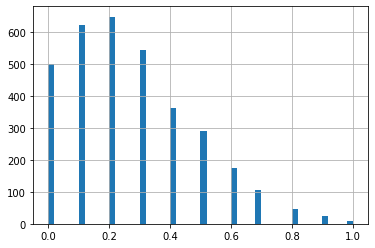

In [71]:
pd.Series(y_scores_forest).hist(bins=50)

In [73]:
from sklearn.metrics import precision_recall_curve
precisions_forest, recalls_forest, thresholds_forest =  precision_recall_curve(y_train, y_scores_forest)

In [75]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])

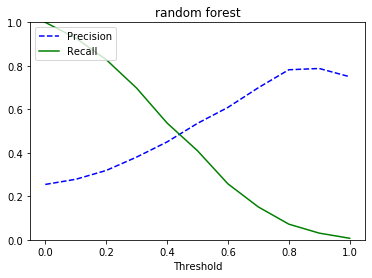

In [76]:
plot_precision_recall_vs_threshold(precisions_forest, recalls_forest, thresholds_forest)
plt.title('random forest')
plt.show()

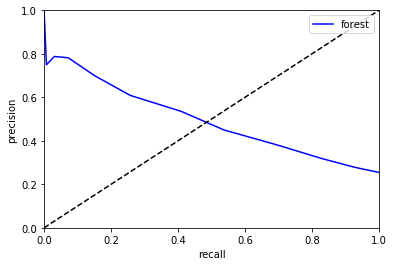

In [77]:
plt.plot(recalls_forest, precisions_forest, 'b-', label = 'forest')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('recall')
plt.ylabel('precision')
plt.axis([0,1,0,1])
plt.legend(loc='upper right')
plt.show()